In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [69]:
df=pd.read_csv(r"C:\Users\ASUS\Desktop\AI&ML\Data_Set\ncr_ride_bookings.csv")

In [70]:
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [72]:
df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

In [156]:
df.describe()

,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,...,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Year,Month,Day,Hour,Minute
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,150000.000000,150000.000000,150000.000000,150000.000000
mean,74388.682153,1.880000,74407.017573,2.143887,87.504413,87.574880,106.940133,242.537527,0.930000,3.891720,...,1946.079340,3234.022000,4.230992,4.404584,3.023453,2024.0,6.490940,15.646087,14.034113,29.477113
std,42945.540159,0.886344,42947.742989,1.784430,50.864164,50.757865,60.906893,104.524977,0.255148,0.587513,...,717.816318,1646.925618,0.343992,0.344738,1.791786,0.0,3.444028,8.781698,5.416906,17.310640
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,3.000000,0.000000,2024.0,1.000000,1.000000,0.000000,0.000000
25%,37193.750000,1.750000,37204.750000,1.000000,43.000000,44.000000,39.000000,150.000000,1.000000,4.000000,...,1653.000000,1747.000000,4.200000,4.300000,2.000000,2024.0,3.000000,8.000000,10.000000,15.000000
50%,74402.500000,2.000000,74421.500000,2.000000,88.000000,88.000000,127.000000,263.000000,1.000000,4.000000,...,2150.000000,3626.000000,4.230992,4.404584,3.000000,2024.0,7.000000,16.000000,15.000000,29.000000
75%,111580.250000,2.000000,111594.250000,3.000000,132.000000,131.000000,158.000000,351.000000,1.000000,4.000000,...,2566.000000,4901.000000,4.300000,4.600000,5.000000,2024.0,9.000000,23.000000,18.000000,44.000000
max,148766.000000,4.000000,148787.000000,6.000000,175.000000,175.000000,181.000000,351.000000,1.000000,5.000000,...,2566.000000,4901.000000,5.000000,5.000000,5.000000,2024.0,12.000000,31.000000,23.000000,59.000000


In [158]:
df.nunique

Booking ID                           148767
Booking Status                            5
Customer ID                          148788
Vehicle Type                              7
Pickup Location                         176
Drop Location                           176
Avg VTAT                                182
Avg CTAT                                352
Cancelled Rides by Customer               2
Reason for cancelling by Customer         6
Cancelled Rides by Driver                 2
Driver Cancellation Reason                5
Incomplete Rides                          2
Incomplete Rides Reason                   4
Booking Value                          2567
Ride Distance                          4902
Driver Ratings                           22
Customer Rating                          22
Payment Method                            6
Year                                      1
Month                                    12
Day                                      31
Hour                            

In [160]:
df.duplicated().sum()

0

# Data cleaning

In [75]:
#Fill NaNs If needed(example: replace missing ratings with mean)
df['Driver Ratings'] = df['Driver Ratings'].fillna(df['Driver Ratings'].mean())
df['Customer Rating'] = df['Customer Rating'].fillna(df['Customer Rating'].mean())

In [76]:
#Droping completely empty columns
df = df.dropna(axis = 1, how='all')

In [78]:
df.describe(include='object')

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Driver Cancellation Reason,Incomplete Rides Reason,Payment Method
count,150000,150000,150000,150000,150000,150000,150000,150000,10500,27000,9000,102000
unique,365,62910,148767,5,148788,7,176,176,5,4,3,5
top,2024-11-16,17:44:57,"""CNR7908610""",Completed,"""CID4523979""",Auto,Khandsa,Ashram,Wrong Address,Customer related issue,Customer Demand,UPI
freq,462,16,3,93000,3,37419,949,936,2362,6837,3040,45909


# Univariate Analysis

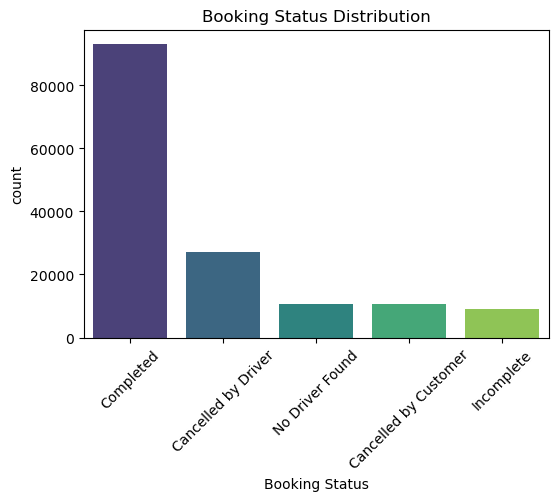

In [80]:
#Booking status distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Booking Status', order=df['Booking Status'].value_counts().index, palette='viridis')
plt.title('Booking Status Distribution')
plt.xticks(rotation=45)
plt.show()

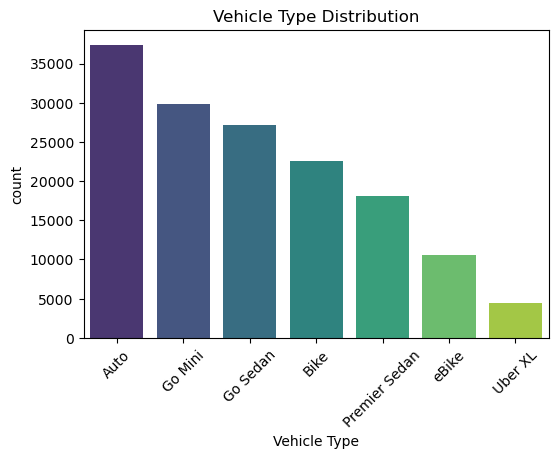

In [81]:
# Vehicle typle Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Vehicle Type', order=df['Vehicle Type'].value_counts().index, palette='viridis')
plt.title("Vehicle Type Distribution")
plt.xticks(rotation=45)
plt.show()

# Numerical Analysis

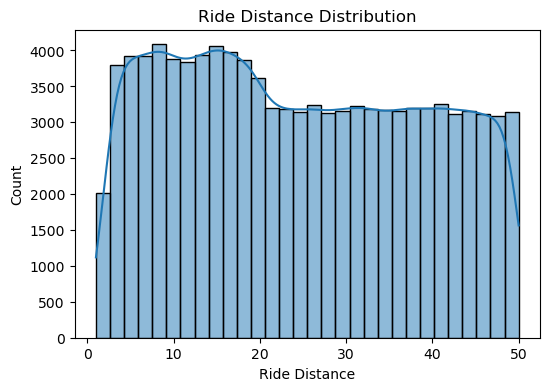

In [83]:
plt.figure(figsize=(6,4))
sns.histplot(df["Ride Distance"], kde=True, bins=30)
plt.title("Ride Distance Distribution")
plt.show()

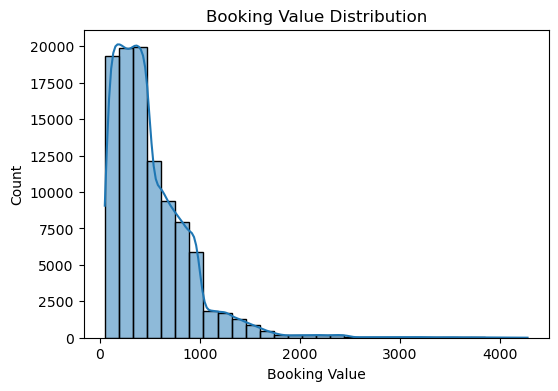

In [84]:
#Booking value
plt.figure(figsize=(6,4))
sns.histplot(df['Booking Value'], kde=True, bins=30)
plt.title("Booking Value Distribution")
plt.show()

# Bivariate Analysis

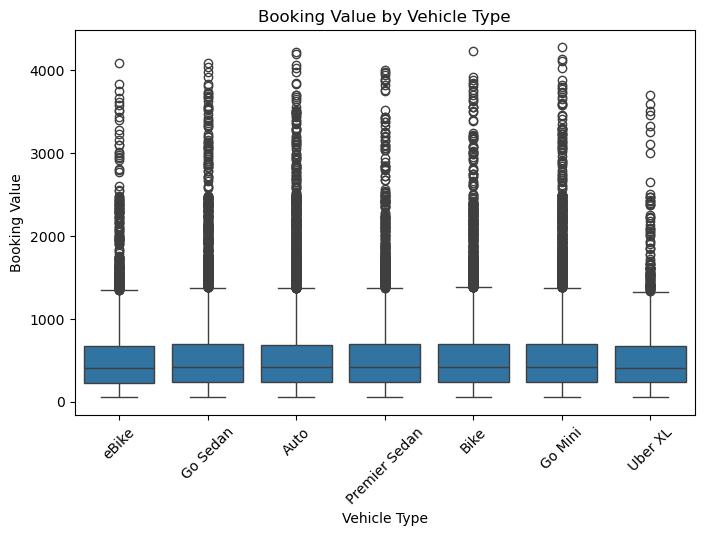

In [86]:
# Booking vakue vs vehicle Type
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Vehicle Type", y="Booking Value")
plt.title("Booking Value by Vehicle Type")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Rating vs Booking Status')

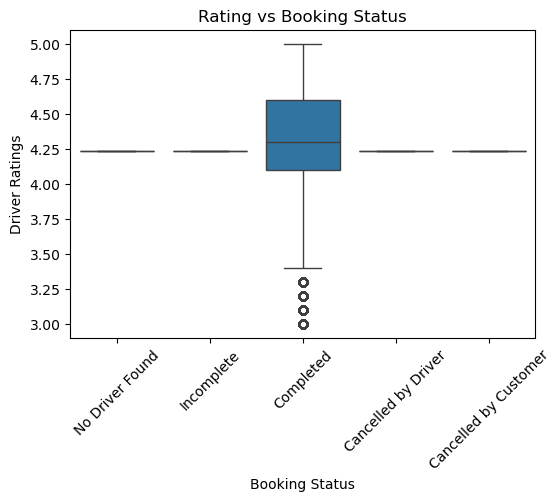

In [87]:
#Rating vs Booking Status
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Booking Status', y='Driver Ratings')
plt.xticks(rotation=45)
plt.title("Rating vs Booking Status")

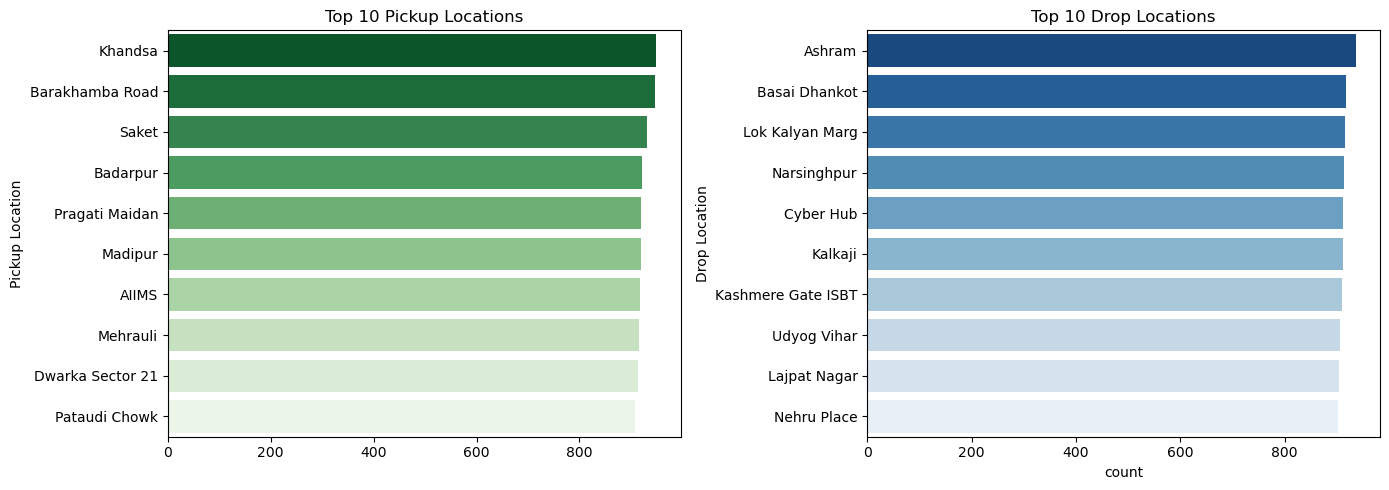

In [88]:
#Top 10 Pickup & Drop Locations
top_pickups = df['Pickup Location'].value_counts().head(10)
top_drops = df['Drop Location'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.barplot(x=top_pickups.values, y=top_pickups.index, ax=axes[0], palette='Greens_r')
axes[0].set_title('Top 10 Pickup Locations')

sns.barplot(x=top_drops, y=top_drops.index, ax=axes[1], palette='Blues_r')
axes[1].set_title('Top 10 Drop Locations')
plt.tight_layout()
plt.show()

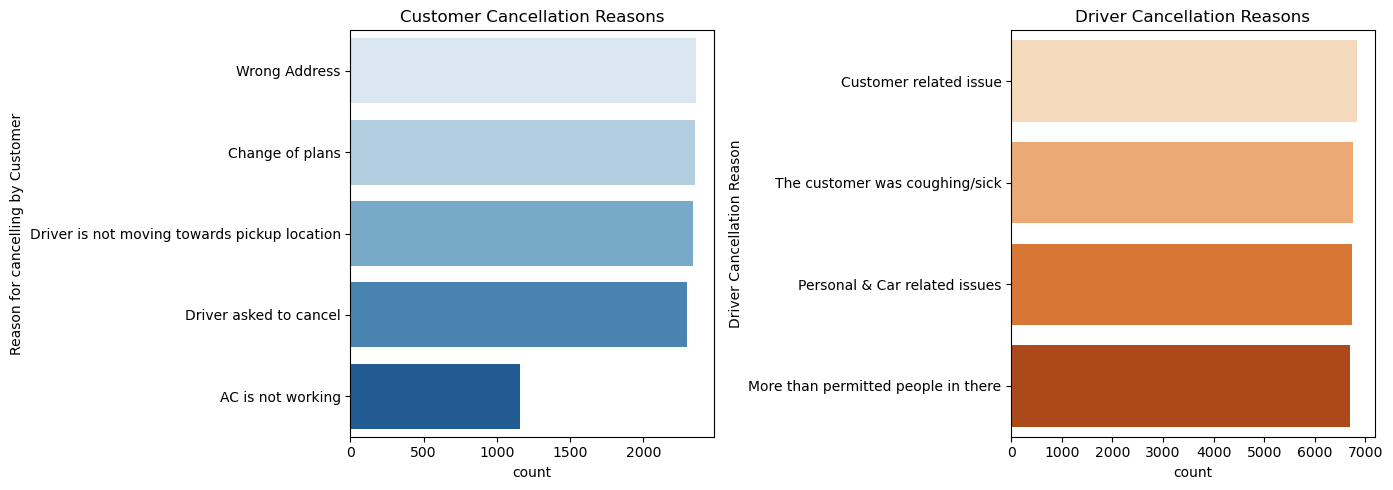

In [89]:
# Cancellation Reasons (Customer & Driver)

fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.countplot(y="Reason for cancelling by Customer", data = df, order=df['Reason for cancelling by Customer'].value_counts().index, ax=axes[0], palette='Blues')
axes[0].set_title("Customer Cancellation Reasons")

sns.countplot(y='Driver Cancellation Reason', data=df, order=df['Driver Cancellation Reason'].value_counts().index, ax=axes[1], palette='Oranges')
axes[1].set_title('Driver Cancellation Reasons')
plt.tight_layout()
plt.show()

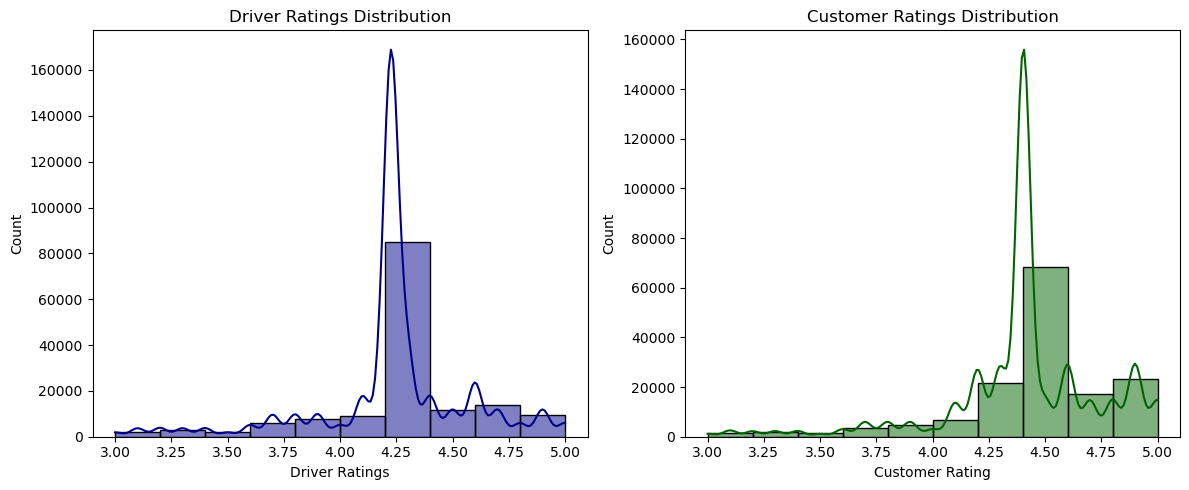

In [90]:
#Rating Distribution (Drivers & Customer)
fig, axes=plt.subplots(1, 2, figsize=(12,5))
sns.histplot(df['Driver Ratings'], bins=10, kde=True, ax=axes[0], color='darkblue')
axes[0].set_title('Driver Ratings Distribution')

sns.histplot(df['Customer Rating'], bins=10, kde=True, ax=axes[1], color='darkgreen')
axes[1].set_title('Customer Ratings Distribution')
plt.tight_layout()
plt.show()

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

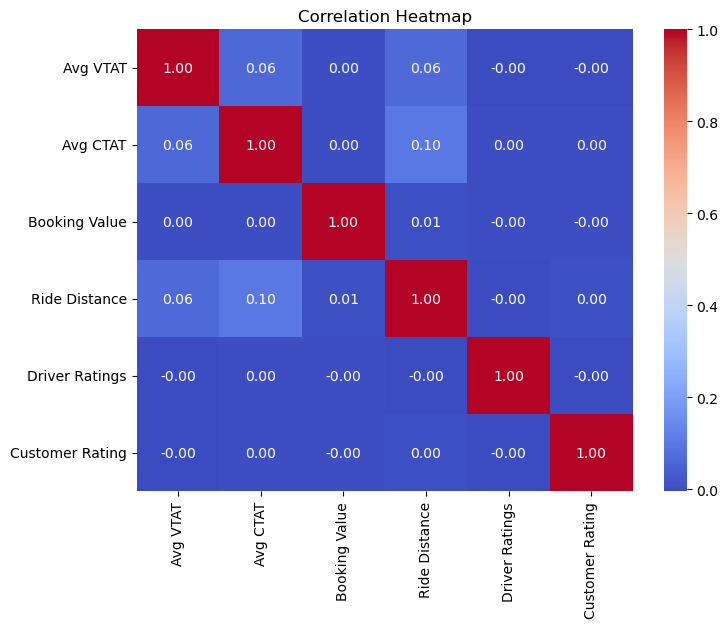

In [92]:
# Correlation Heatmap
num_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Predictive Modeling 

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [118]:
#Convert Date & Time to DateTime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')

In [120]:
#Extract useful date & time features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

In [122]:
#Drop original Date/Time Columns
df = df.drop(columns =['Time', 'Date'])

In [124]:
#Fill Missing Values
df = df.fillna('Unknown')

In [126]:
#Encode Categorical Variables
label_encoder = {}
for col in df.columns:
    if df[col].dtype == 'object' or isinstance(df[col].iloc[0], str):
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoder[col] = le

In [128]:
#Define Features & Target
target_col = "Booking Status"
X = df.drop(target_col, axis=1)
Y = df[target_col]

In [130]:
#Scale Numeric Features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [132]:
#Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [134]:
#Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision_Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [144]:
#Try Importing XGBoost if available
try:
    from xgboost import XGBClassifier
    models['XGBoost'] = XGBClassifier(eval_metric = 'mlogloss')
except ImportError:
    print("XGBoost not installed, skipping....")

In [146]:
# Train & Evaluate
accuracies = {}
for name, model in models.items():
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(Y_test, preds) * 100
    accuracies[name] = round(acc, 2)

In [152]:
#Show Results 
results_df = pd.DataFrame(list(accuracies.items()), columns = ['Model','Accuracy (%)'])
print(results_df)

                 Model  Accuracy (%)
0  Logistic Regression        100.00
1        Decision_Tree        100.00
2        Random Forest        100.00
3          Naive Bayes        100.00
4                  SVM        100.00
5                  KNN         99.81
6              XGBoost        100.00


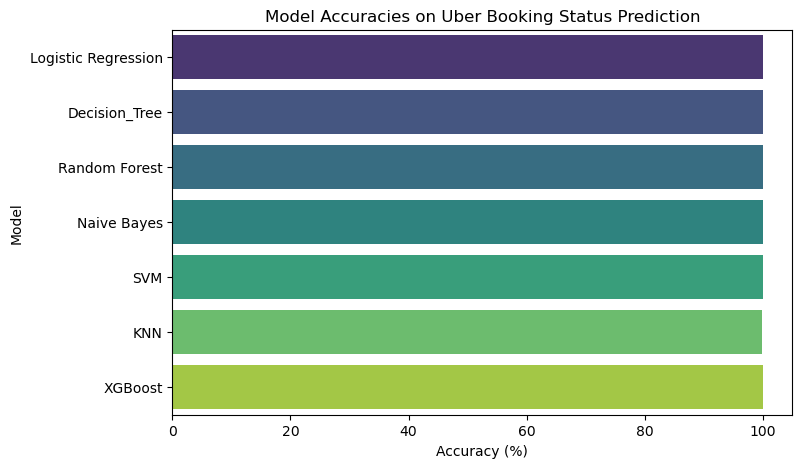

In [154]:
#Plot Barchart
plt.figure (figsize=(8,5))
sns.barplot(x='Accuracy (%)', y = 'Model', data = results_df, palette = 'viridis')
plt.title('Model Accuracies on Uber Booking Status Prediction')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.show()